{% include toc title="In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Open a lidar raster dataset in `Python` using `rasterio` and a context manager to handle file connections.
* Be able to identify the resolution of a raster in `Python`.
* Be able to plot a lidar raster dataset in `Python` using `matplotlib`.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

[<i class="fa fa-download" aria-hidden="true"></i> Download spatial-vector-lidar data subset (~172 MB)](https://ndownloader.figshare.com/files/12459464){:data-proofer-ignore='' .btn }

You will need a computer with internet access to complete this lesson. If you are following along online and not using our cloud environment:

[<i class="fa fa-download" aria-hidden="true"></i> Get data and software setup instructions here]({{site.url}}/workshops/gis-open-source-python/){:data-proofer-ignore='' .btn }

You will need the Python 3.x Anaconda distribution, git and bash to set things up.


</div>

In this lesson, you will learn how to open a plot a lidar raster dataset in `Python`. 


## What is a Raster?

Raster or “gridded” data are stored as a grid of values which are rendered on a
map as pixels. Each pixel value represents an area on the Earth’s surface. A raster file is a composed of regular grid of cells, all of which are the same size. You've looked at and used rasters before if you've looked at photographs
or imagery in a tool like Google Earth. However, the raster files that you will work with are different from photographs in that they are spatially referenced. Each pixel represents an area of land on the ground. That area is defined by the spatial **resolution** of the raster.

<figure>
   <a href="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-concept.png" target="_blank">
   <img src="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-concept.png" alt="Raster data concept diagram."></a>
   <figcaption>A raster is composed of a regular grid of cells. Each cell is the same
   size in the x and y direction. Source: Colin Williams, NEON.
   </figcaption>
</figure>

### Raster Facts

A few notes about rasters:

-  Each cell is called a pixel.
-  And each pixel represents an area on the ground.
-  The resolution of the raster represents the area that each pixel represents the area it represents on the ground. So, a 1 meter resolution raster, means that each pixel represents  a 1 m by 1m area on the ground.

A raster dataset can have attributes associated with it as well. For instance in a LiDAR derived digital elevation model (DEM), each cell represents an elevation value for that location on the earth. In a LIDAR derived intensity image, each cell represents a LIDAR intensity value or the amount of light energy returned to and recorded by the sensor.

<figure>
   <a href="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-resolution.png" target="_blank">
   <img src="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-resolution.png" alt="Raster data resolution concept diagram."></a>
   <figcaption>Rasters can be stored at different resolutions. The resolution simply
   represents the size of each pixel cell. Source: Colin Williams, NEON.
   </figcaption>
</figure>


## Open Raster Data in Python

You can use the `rasterio` library combined with `numpy` and `matplotlib` to open, manipulate and plot raster data in `Python`. To begin you will load a suite of python libraries required to complete this lesson. These libraries are all a part of the `earth-analytics-python` environment. 


 Be sure to set your working directory
`os.chdir("path-to-you-dir-here/earth-analytics/data")`

In [1]:
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
# a package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.spatial as es
# plot inline in the notebook
plt.ion()
# set home directory and download data
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


Next, download the data. This line of code should only be run if you don't have the data on your computer already!

In [2]:
# get the data (it should end up in your home/earth-analytics/data directory)
# once you have downloaded the data this will not run again unless you force it to overwrite
et.data.get_data("spatial-vector-lidar")


'C:\\Users\\jomc9287\\earth-analytics\\data\\spatial-vector-lidar\\.'

Note that you import the `rasterio` library using the alias (or shortname) `rio`.
You use the `rio.open("path-to-raster-here")` function to open a raster dataset using `rio` in `Python`.


In [3]:
# define path to digital terrain model
sjer_dtm_path = "data/spatial-vector-lidar/california/neon-soap-site/2013/lidar/SOAP_lidarDTM.tif"

# open raster data
lidar_dem = rio.open(sjer_dtm_path)
# optional - view spatial extent
lidar_dem.bounds

BoundingBox(left=296906.0, bottom=4100038.0, right=300198.0, top=4101554.0)

You can quickly plot the raster using the `rasterio` function,  `show()`.

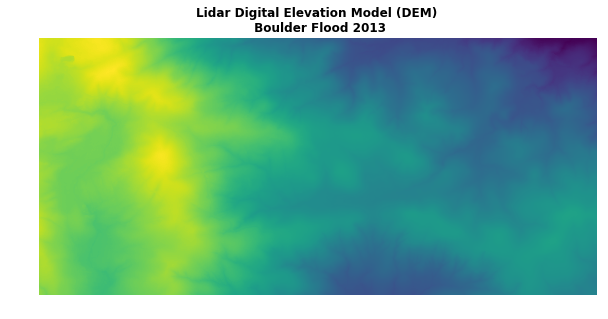

In [4]:
# plot the dem using raster.io
fig, ax = plt.subplots(figsize = (10,8))
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)
ax.set_axis_off()

### Opening and Closing File Connections

The `rasterio` library is efficient as it establishes a connection with the 
raster file rather than directly reading it into memory. Because it creates a 
connection, it is important that you close the connection after it is opened
AND after you've finished working with the data!


In [5]:
# close the file connection
lidar_dem.close()

```
# this returns an error as you have closed the connection to the file. 
show(lidar_dem)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-7-dad244dfd7d3> in <module>()
      1 # this returns an error as you have closed the connection to the file.
----> 2 show(lidar_dem)

~/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/plot.py in show(source, with_bounds, contour, contour_label_kws, ax, title, **kwargs)
     80     elif isinstance(source, RasterReader):
     81         if source.count == 1:
---> 82             arr = source.read(1, masked=True)
     83         else:
     84             try:

rasterio/_io.pyx in rasterio._io.RasterReader.read (rasterio/_io.c:10647)()

rasterio/_io.pyx in rasterio._io.RasterReader._read (rasterio/_io.c:15124)()

ValueError: can't read closed raster file

```

Once the connection is closed, you can no longer work with the data. You'll need 
to re-open the connection. Like this:

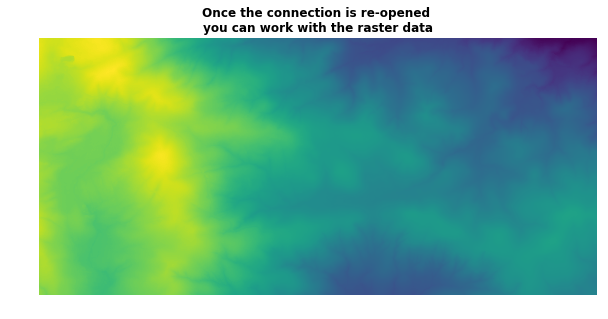

In [6]:
# open raster data connection - again
lidar_dem = rio.open(sjer_dtm_path)

fig, ax = plt.subplots(figsize = (10,10))
show(lidar_dem, 
     title="Once the connection is re-opened \nyou can work with the raster data", 
     ax=ax)
ax.set_axis_off()

In [7]:
lidar_dem.close()

## Context Manager to Open/Close Raster Data

A better way to work with raster data in `rasterio` is to use the context manager. This will handle opening and closing the raster file for you. 

`with rio.open('name of file') as scr:
    src.rasteriofunctionname()`


In [8]:
# view spatial extent of raster object
with rio.open(sjer_dtm_path) as src:
    print(src.bounds)

BoundingBox(left=296906.0, bottom=4100038.0, right=300198.0, top=4101554.0)


Once you are outside of the `with` statement, you can no long access the `src` object which contains the spatial raster information.

## Raster Plots with Matplotlib

Let's try this again. Open the same DEM using a context manager. Then let's plot again but this time using matplotlib imshow. Using `matplotlib` allows you to fully customize your plots. Do the following

1. use .read() to read in your raster data as a numpy array
2. set masked = True to ensure that no data values get translated to `nan`. 
3. only read in the first band of your single band image. If you don't specify `1` when you read in a raster you will get a 3 dimensional array. 

<!-- How carson gets the bounds element # Get the bounds of the raster (for plotting later)
#bounds = lidar_dem.bounds[::2] + lidar_dem.bounds[1::2]
#bounds -->

In [9]:
# read in all of the data without specifying a band
with rio.open(sjer_dtm_path) as src:
    # convert / read the data into a numpy array:
    lidar_dem_im = src.read(masked= True)
    
# view array shape -- notice that you have 3 dimensions below
print(lidar_dem_im.shape)

(1, 1516, 3292)


In [10]:
# specify a band so you get a 2 dimensional image array
with rio.open(sjer_dtm_path) as src:
    # convert / read the data into a numpy array:
    lidar_dem_im = src.read(1, masked= True)
    sjer_ext = rio.plot.plotting_extent(src)
    
# view array shape -- here you have a 2 dimensional array as you would expect to have
print(lidar_dem_im.shape)

(1516, 3292)


In [11]:
sjer_ext

(296906.0, 300198.0, 4100038.0, 4101554.0)

## Plot A Raster Using Rasterio 

You are now ready to plot your data using `imshow()` and matplotlib. 
 

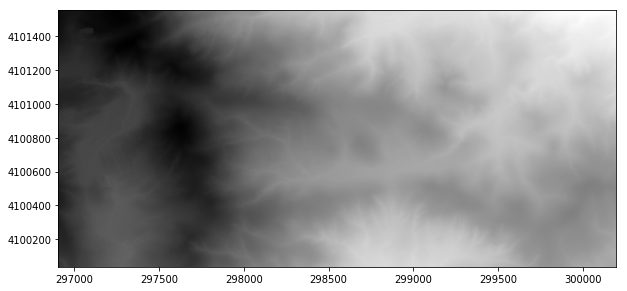

In [12]:
fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(lidar_dem_im, 
     cmap = 'Greys', 
     extent = sjer_ext);

If you provide the spatial extent of the raster to the plot, it will be plotted in the correct spatial location.
This is important if you plan to overlay another spatial data layer on top of your raster plot. 

Text(0.5,1,'Digital Elevation Model - Pre 2013 Flood\n Plotted Using the Correct Spatial Extent')

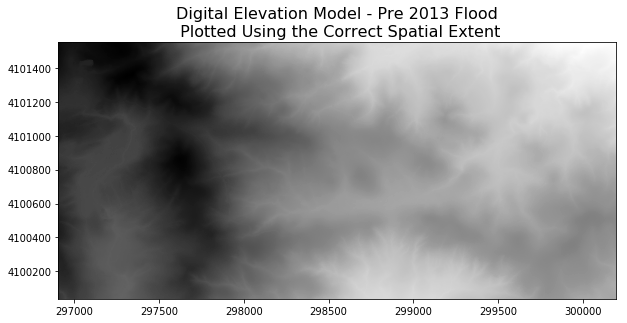

In [13]:
fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(lidar_dem_im, 
     cmap = 'Greys', 
     extent = sjer_ext)
# add a title and adjust the size of the font.
# you can add a title to show() but it's not as easy to define the font size
ax.set_title("Digital Elevation Model - Pre 2013 Flood\n Plotted Using the Correct Spatial Extent",
             fontsize = 16)

Adding a `;` at the end of the last line of your plot will 
turn off the message that you might otherwise get from matplotline: `Text(0.5,1,'Digital Elevation Model - Pre 2013 Flood')`
    

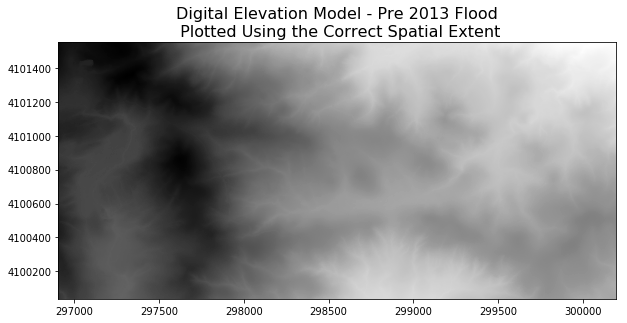

In [14]:
fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(lidar_dem_im, 
     cmap = 'Greys',
     extent = sjer_ext)
# add a title and adjust the size of the font.
ax.set_title("Digital Elevation Model - Pre 2013 Flood\n Plotted Using the Correct Spatial Extent",
             fontsize = 16);

Let's plot again but this time you will:

1. add a colorbar using `es.colorbar()`
2. turn off the annoying matplotlib message by adding a semicolon `;` to the end of the last line
3. turn off the axes given you don't need the coordinates in your plot
4. increase the title font size using the `as.set_title` function and the `fontsize` argument 

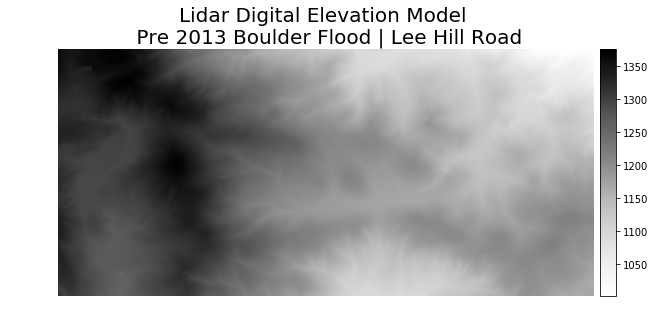

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
lidar_plot = ax.imshow(lidar_dem_im,
     cmap = 'Greys',
     extent = sjer_ext)
ax.set_title("Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road",
            fontsize=20)
es.colorbar(lidar_plot)
ax.set_axis_off();

Below you tweak the height of your colorbar to ensure it lines up with the top and bottom edges of your plot. To do this you use the `make_axes_locatable` package from the `mpl_toolkits.axes_grid1` library.

<div class="notice--success" markdown="1">

### <i class="fa fa-star"></i> Color Ramps

To plot you can select [pre-determined color ramps](https://matplotlib.org/users/colormaps.html) from `matplotlib`, you can reverse a color ramp by adding `_r` at the end of the color ramps name, for example `cmap = 'viridis_r'`. 

</div>

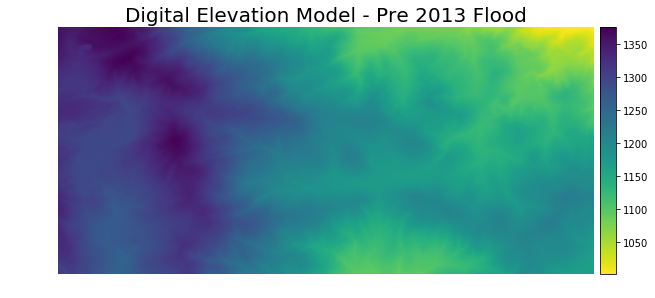

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(lidar_dem_im, 
               cmap='viridis_r',
               extent = sjer_ext)
ax.set_title("Digital Elevation Model - Pre 2013 Flood", 
             fontsize=20)
es.colorbar(im)
ax.set_axis_off();

### Explore Raster Data Values with Histograms

Next, you will explore a histogram of your data. A histogram is useful to help 
you better understand the distribution of values within your data. In this 
case given you are looking at elevation data, if there are all small elevation values 
and the histogram looks uniform (not too much variation in values) you can assume 
that your study area is relative "flat" - not too hilly. If there is a different
distribution of elevation values you can begin to understand the 
range of elevation values in your study area and the degree of difference between 
low and high regions (ie is it flat or hilly?). Is it high elevation vs 
low elevation?

To plot a histogram use the `rasterio` - `show_hist()` function.

In [17]:
# format histograms
# plt.rcParams['figure.figsize'] = (8, 8)
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['axes.facecolor']='white'
# plt.rcParams['grid.color'] = 'grey'
# plt.rcParams['grid.linestyle'] = '-'
# plt.rcParams['grid.linewidth'] = '.5'
# plt.rcParams['lines.color'] = 'purple'
# plt.rcParams['axes.labelsize'] = 16

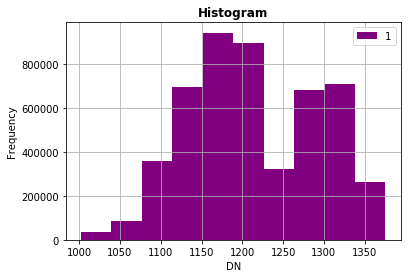

In [24]:
# create histogram of data
show_hist(lidar_dem_im, 
                   facecolor = 'purple')

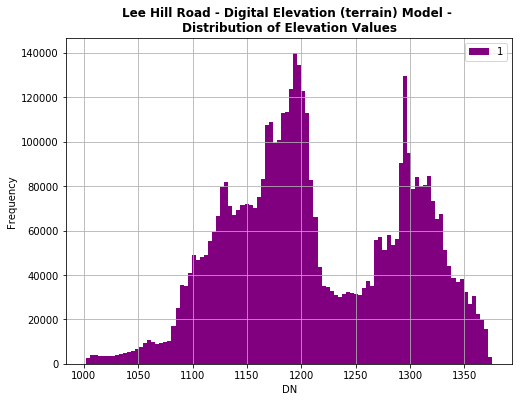

In [19]:
fig, ax = plt.subplots(figsize = (8,6))
# create histogram of data
show_hist(lidar_dem_im, 
          facecolor = 'purple',
          ax=ax,
          bins = 100,
          title = "Lee Hill Road - Digital Elevation (terrain) Model - \nDistribution of Elevation Values")

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> On Your Own - Challenge

The file that you opened above was an elevation model representing the elvation of a field site in California. Next, open up and plot the file: `"data/spatial-vector-lidar/california/neon-sjer-site/2013/lidar/SJER_lidarDSM.tif"`. If you want, produce a histogram of the data to better understand the range of elevation values in your data. 

</div>

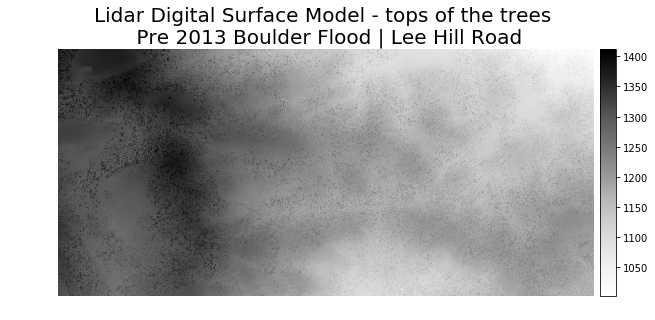

In [21]:
soap_dsm_path = "data/spatial-vector-lidar/california/neon-soap-site/2013/lidar/SOAP_lidarDSM.tif"

with rio.open(soap_dsm_path) as src:
    DSM_array = src.read(1, masked=True)
    soap_ext = rio.plot.plotting_extent(src)
    
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
lidar_plot = ax.imshow(DSM_array, cmap = 'Greys', extent = soap_ext)
ax.set_title("Lidar Digital Surface Model - tops of the trees \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize= 20)
es.colorbar(lidar_plot)
ax.set_axis_off();